In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import warnings
warnings.filterwarnings('ignore')

(a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [34]:
data = pd.read_csv('../data/Frogs_MFCCs.csv')
data

#data['Family'].value_counts()
#data['Genus'].value_counts()
#data['Species'].value_counts()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [35]:
x_data = data.iloc[:, :22] #selecting 22 columns according to readme
y_data = data.iloc[:, 22:-1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state = 42) #70% train, 30% test

x_train.shape
x_test.shape

(2159, 22)

(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach: <br>
i) Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

Exact Match: <br>
Sample based accuracy method as every label of a sample must exactly match to the one in the dataset <br>

Hamming Score/Loss: <br>
Label based metric that counts each mismatched label instead of considering the labels of sample data as one

ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [36]:
#splitting the train features according to labels
y_train_family = y_train['Family']
y_train_genus = y_train['Genus']
y_train_species = y_train['Species']

#splitting the test features according to labels
y_test_family = y_test['Family']
y_test_genus = y_test['Genus']
y_test_species = y_test['Species']

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn import preprocessing

c_range = [10**c for c in np.arange(-3,7, dtype=float)]
gamma_range = np.arange(0.1, 2.1, 0.1)


#SVM for one versus all classifiers
svc_model = SVC(kernel='rbf', random_state=42, max_iter = 1000)
parameters = {'C':c_range, 'gamma':gamma_range}

# build and fit the grid search for given classifier
svc_family = GridSearchCV(svc_model, parameters, cv=10).fit(x_train, y_train_family)
svc_genus = GridSearchCV(svc_model, parameters, cv=10).fit(x_train, y_train_genus)
svc_species = GridSearchCV(svc_model, parameters, cv=10).fit(x_train, y_train_species)

In [38]:
c_family, gamma_family = svc_family.best_params_['C'], svc_family.best_params_['gamma']
c_genus, gamma_genus = svc_genus.best_params_['C'], svc_genus.best_params_['gamma']
c_species, gamma_species = svc_species.best_params_['C'], svc_species.best_params_['gamma']

print('Label: Family, c = ', c_family, 'and gamma = ', gamma_family)
print('Label: Genus, c = ', c_genus, 'and gamma = ', gamma_genus)
print('Label: Species, c = ', c_species, 'and gamma = ', gamma_species)

Label: Family, c =  10.0 and gamma =  2.0
Label: Genus, c =  100.0 and gamma =  1.5000000000000002
Label: Species, c =  10.0 and gamma =  1.8000000000000003


In [39]:
# using the best parameters
svc_model_family = SVC(C=c_family, gamma=gamma_family,kernel='rbf', random_state=42, max_iter = 1000).fit(x_train, y_train_family)
svc_model_genus = SVC(C=c_genus, gamma=gamma_genus,kernel='rbf', random_state=42, max_iter = 1000).fit(x_train, y_train_genus)
svc_model_species = SVC(C=c_species, gamma=gamma_species,kernel='rbf', random_state=42, max_iter = 1000).fit(x_train, y_train_species)

y_predict_family = pd.DataFrame(svc_model_family.predict(x_test))
y_predict_genus = pd.DataFrame(svc_model_genus.predict(x_test))
y_predict_species = pd.DataFrame(svc_model_species.predict(x_test))
y_predict = pd.concat([y_predict_family, y_predict_genus, y_predict_species], axis=1)

print(y_predict)

                    0          0                       0
0     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1             Hylidae  Hypsiboas    HypsiboasCinerascens
2             Hylidae  Hypsiboas       HypsiboasCordobae
3     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
4     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
...               ...        ...                     ...
2154  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2155  Leptodactylidae  Adenomera          AdenomeraAndre
2156  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2157  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2158  Leptodactylidae  Adenomera  AdenomeraHylaedactylus

[2159 rows x 3 columns]


In [40]:
def HammingScore(y_predict, y_true):
  count = 0
  y_predict = y_predict.reset_index().iloc[:,1:]
  y_true = y_true.reset_index().iloc[:,1:]
  instances = y_predict.shape[0]
  for i, row in enumerate(y_predict.iterrows()):
    if y_predict.loc[i].tolist() == y_true.loc[i].tolist():
      count += 1
  return count/instances


svc_model_hamming_score = HammingScore(y_predict, y_test)
print('Harmming Score:', svc_model_hamming_score)
print('Harmming Loss:', 1-svc_model_hamming_score)

Harmming Score: 0.9874942102825383
Harmming Loss: 0.012505789717461746


iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [41]:
# standardize data
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(x_train)

parameters = {'C':c_range}
svc_model_l1 = LinearSVC(penalty='l1', dual=False, random_state=42)

l1_family = GridSearchCV(svc_model_l1, parameters, cv=10).fit(X_train_std, y_train_family)
l1_genus = GridSearchCV(svc_model_l1, parameters, cv=10).fit(X_train_std, y_train_genus)
l1_species = GridSearchCV(svc_model_l1, parameters, cv=10).fit(X_train_std, y_train_species)

X_test_stand = scaler.fit_transform(x_test)

In [42]:
c_family_l1 = l1_family.best_params_['C']
c_genus_l1 = l1_genus.best_params_['C']
c_species_l1 = l1_species.best_params_['C']

svc_model_family_l1 = LinearSVC(penalty='l1', C=c_family_l1, dual=False, random_state=42).fit(X_train_std, y_train_family)
svc_model_genus_l1 = LinearSVC(penalty='l1', C=c_genus_l1, dual=False, random_state=42).fit(X_train_std, y_train_genus)
svc_model_species_l1 = LinearSVC(penalty='l1', C=c_species_l1, dual=False, random_state=42).fit(X_train_std, y_train_species)

y_predict_family_l1 = pd.DataFrame(svc_model_family_l1.predict(X_test_stand))
y_predict_genus_l1 = pd.DataFrame(svc_model_genus_l1.predict(X_test_stand))
y_predict_species_l1 = pd.DataFrame(svc_model_species_l1.predict(X_test_stand))
y_predict_l1 = pd.concat([y_predict_family_l1, y_predict_genus_l1, y_predict_species_l1], axis=1)

svc_hamming_score_l1 = HammingScore(y_predict_l1, y_test)
print('L1-penalized SVM')
print('Hamming Score:', svc_hamming_score_l1)
print('Hamming Loss:', 1-svc_hamming_score_l1)

L1-penalized SVM
Hamming Score: 0.9092172301991662
Hamming Loss: 0.09078276980083377


iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [43]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_train_family_smote, y_train_family_smote = sm.fit_resample(X_train_std, y_train_family)
x_train_genus_smote, y_train_genus_smote = sm.fit_resample(X_train_std, y_train_genus)
x_train_species_smote, y_train_species_smote = sm.fit_resample(X_train_std, y_train_species)

In [44]:
parameters = {'C':c_range}
svc_model_l1 = LinearSVC(penalty='l1', dual=False, random_state=233)

l1_smote_family = GridSearchCV(svc_model_l1, parameters, cv=10).fit(x_train_family_smote, y_train_family_smote)
l1_smote_genus = GridSearchCV(svc_model_l1, parameters, cv=10).fit(x_train_genus_smote, y_train_genus_smote)
l1_smote_species = GridSearchCV(svc_model_l1, parameters, cv=10).fit(x_train_species_smote, y_train_species_smote)

c1_smote = l1_smote_family.best_params_['C']
c2_smote = l1_smote_genus.best_params_['C']
c3_smote = l1_smote_species.best_params_['C']

In [45]:
l1_smote_model_family = LinearSVC(penalty='l1', C=c1_smote, dual=False, random_state=42).fit(x_train_family_smote, y_train_family_smote)
l1_smote_model_genus = LinearSVC(penalty='l1', C=c2_smote, dual=False, random_state=42).fit(x_train_genus_smote, y_train_genus_smote)
l1_smote_model_species = LinearSVC(penalty='l1', C=c3_smote, dual=False, random_state=42).fit(x_train_species_smote, y_train_species_smote)

y_predict_family_smote = pd.DataFrame(l1_smote_model_family.predict(X_test_stand))
y_predict_genus_smote = pd.DataFrame(l1_smote_model_genus.predict(X_test_stand))
y_predict_species_smote = pd.DataFrame(l1_smote_model_species.predict(X_test_stand))
y_predict_smote = pd.concat([y_predict_family_smote, y_predict_genus_smote, y_predict_species_smote], axis=1)

smote_hamming_score = HammingScore(y_predict_smote, y_test)
print('L1-penalized SVM (SMOTE)')
print('Hamming Loss:', 1-smote_hamming_score)

L1-penalized SVM (SMOTE)
Hamming Loss: 0.13756368689207965


2. K-Means Clustering on a Multi-Class and Multi-Label Data Set<br>
Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_val = np.arange(2, 51)
k_val

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [47]:
#initialize the best k value to 1 and silhouette score to 0
best_k_val = 1
score_max = 0

#finding optimal K
for k in k_val:
    kmeans = KMeans(n_clusters=k).fit(x_data)
    labels = kmeans.labels_
    score = silhouette_score(x_data, labels)
    print("Attempt:", k)
    print("silhouette score:", score)
    if score > score_max:
        score_max = score
        best_k_val = k

print("--------------------------------")
print("Best k value = ", best_k_val)

Attempt: 2
silhouette score: 0.3486778410277152
Attempt: 3
silhouette score: 0.36768245219926315
Attempt: 4
silhouette score: 0.3787509343305295
Attempt: 5
silhouette score: 0.37149147864771287
Attempt: 6
silhouette score: 0.2644052337316085
Attempt: 7
silhouette score: 0.2605150881259886
Attempt: 8
silhouette score: 0.25390025742725003
Attempt: 9
silhouette score: 0.27648870402759396
Attempt: 10
silhouette score: 0.28108452937216016
Attempt: 11
silhouette score: 0.27165190071071055
Attempt: 12
silhouette score: 0.2713666190780047
Attempt: 13
silhouette score: 0.27823599537927923
Attempt: 14
silhouette score: 0.28467943684251124
Attempt: 15
silhouette score: 0.27060464219222724
Attempt: 16
silhouette score: 0.28960311281381923
Attempt: 17
silhouette score: 0.27911327103620476
Attempt: 18
silhouette score: 0.2803099783991661
Attempt: 19
silhouette score: 0.2853041117396457
Attempt: 20
silhouette score: 0.2814696526490778
Attempt: 21
silhouette score: 0.2725965039134149
Attempt: 22
silho

(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [48]:
#using the best k value from above
kmeans = KMeans(n_clusters=best_k_val, random_state=42).fit(x_data)
labels = kmeans.labels_

y_family = y_data['Family']
y_genus = y_data['Genus']
y_species = y_data['Species']

cluster_id = dict()
labels = pd.Series(labels)

for i in range(best_k_val):
    cluster_id[i] = labels.index[labels==i].tolist()

    majority_family = y_family[cluster_id[i]].value_counts().index[0]
    majority_genus = y_genus[cluster_id[i]].value_counts().index[0]
    majority_species = y_species[cluster_id[i]].value_counts().index[0]
    
    print('Cluster:', i)
    print('Majority in Family:', majority_family)
    print('Majority in Genus:', majority_genus)
    print('Majority in Species:', majority_species)
    print('-------------------------------------------')

Cluster: 0
Majority in Family: Leptodactylidae
Majority in Genus: Adenomera
Majority in Species: AdenomeraHylaedactylus
-------------------------------------------
Cluster: 1
Majority in Family: Hylidae
Majority in Genus: Hypsiboas
Majority in Species: HypsiboasCordobae
-------------------------------------------
Cluster: 2
Majority in Family: Hylidae
Majority in Genus: Hypsiboas
Majority in Species: HypsiboasCinerascens
-------------------------------------------
Cluster: 3
Majority in Family: Dendrobatidae
Majority in Genus: Ameerega
Majority in Species: Ameeregatrivittata
-------------------------------------------


(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [49]:
def HammingDistance(y_predict, y_true):
    count = 0
    y_predict = y_predict.reset_index().iloc[:,1:]
    y_true = y_true.reset_index().iloc[:,1:]
    instances = y_predict.shape[0]
    for i, row in enumerate(y_predict.iterrows()):
        if y_predict.loc[i].tolist() == y_true.loc[i].tolist():
            count += 1
    return instances - count

In [50]:
hamming_distances = []
hamming_scores = []
hamming_loss = []
pd.concat([y_family, y_family, y_family], axis=1)
y_data_col = y_family.append(y_genus).append(y_species)

for i in range(50):
    kmeans = KMeans(n_clusters=best_k_val).fit(x_data)
    labels = kmeans.labels_
    cluster_id = dict()
    labels = pd.Series(labels)
    cluster_majority = dict()
 
    for i in range(best_k_val):
        cluster_id[i] = labels.index[labels==i].tolist()
        majority_family = y_family[cluster_id[i]].value_counts().index[0]
        majority_genus = y_genus[cluster_id[i]].value_counts().index[0]
        majority_species = y_species[cluster_id[i]].value_counts().index[0]
        cluster_majority[i] = [majority_family, majority_genus, majority_species]
    
    y_labels = pd.DataFrame(columns=y_data.columns, index=y_data.index)
    for cluster in range(4):
        for i in cluster_id[cluster]:
            y_labels.loc[i] = cluster_majority[cluster]

    hamming_dist = HammingDistance(y_labels, y_data)
    hamming_score = HammingScore(y_labels, y_data)
    hamming_loss_val = 1 - hamming_score
    
    hamming_distances.append(hamming_dist)
    hamming_scores.append(hamming_score)
    hamming_loss.append(hamming_loss_val)

avg_hamming_dist = np.array(hamming_distances).mean()
avg_hamming_score = np.array(hamming_scores).mean()
avg_hamming_loss = np.array(hamming_loss).mean()
std_hamming_dist = np.array(hamming_distances).std()
std_hamming_score = np.array(hamming_scores).std()
std_hamming_loss = np.array(hamming_loss).std()

In [51]:
print('Average Hamming Distance = ', avg_hamming_dist)
print('Average Hamming Score = ', avg_hamming_score)
print('Average Hamming Loss = ', avg_hamming_loss)
print('The standard deviation of Hamming Distance = ',std_hamming_dist)
print('The standard deviation of Hamming Score = ',std_hamming_score)
print('The standard deviation of Hamming Loss = ',std_hamming_loss)

Average Hamming Distance =  1802.1
Average Hamming Score =  0.7495343988881169
Average Hamming Loss =  0.25046560111188326
The standard deviation of Hamming Distance =  130.33575871571085
The standard deviation of Hamming Score =  0.018114768410800678
The standard deviation of Hamming Loss =  0.018114768410800675


3. ISLR 12.6.2

(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

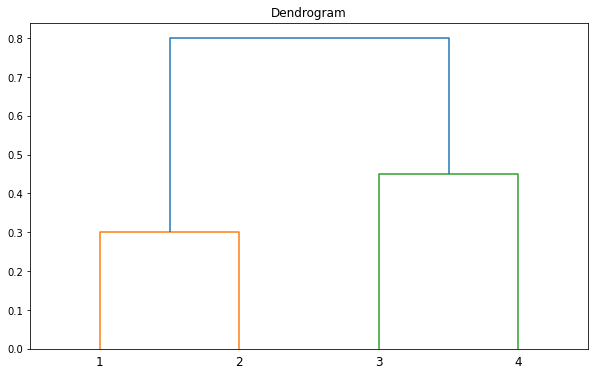

In [52]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

dist_matrix = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
dist = squareform(dist_matrix)
linkage_matrix = linkage(dist, "complete")
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

(b) Repeat (a), this time using single linkage clustering.

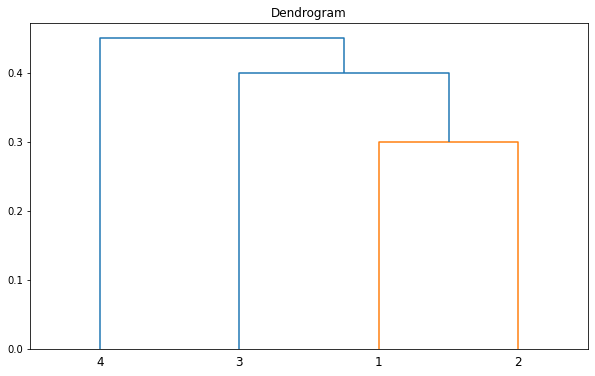

In [53]:
linkage_matrix = linkage(dist, "single")
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

(c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?

Observations 1 and 2 are in Cluster A <br>
Observations 3 and 4 are in Cluster B

(d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?

Observations 1, 2 and 3 are in Cluster A
Observation 4 is in Cluster B

(e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

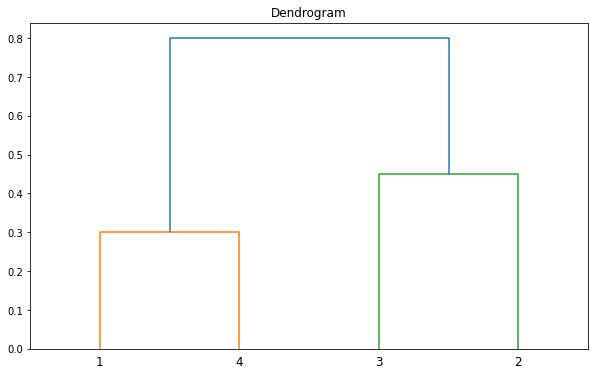

In [54]:
dist_matrix = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
dist = squareform(dist_matrix)
linkage_matrix = linkage(dist, "complete")
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
dendrogram(linkage_matrix, labels=["1", "4", "3", "2"])
plt.title("Dendrogram")
plt.show()